In [61]:
# Importing packages to visualise
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from collections import defaultdict
%matplotlib inline

In [2]:
# Reading the dataset 
genome_info = '/content/chr2L.fa'
sequence_info = '/content/10k_reads.fastq'

In [3]:
# Parsing the file
def readGenome(aFile):
    ''' Funtion to read the fasta file. In our fastq file we have a special character and we need to consider our codes after that. '''
    f = open(aFile)
    aval = ''.join([i.rstrip() for i in f.readlines() if not i[0] == '>'])
    return aval.upper() # Since our characters consist of mixed case letters.

In [4]:
# Count the number of bases present 
def countFrequency(listToPass):
    ''' This functions counts the frequency of each base present in our genome '''
    base_count = {'A':0,'G':0,'C':0,'T':0} # To keep a count number of bases present in our dataset
    for i in listToPass:
        if i in base_count.keys():
            base_count[i] += 1
    return base_count

In [5]:
# Function to read the sequence
def readSequence(seq):
    ''' A function to extract all the sequence and quality score from our dataset. This intakes the fastq file.'''
    f = open(seq,'r') # Reading the file
    sequence,quality = [],[]
    while True:
        f.readline()
        seq = f.readline().rstrip() # Assigning our sequence to a variable
        f.readline()
        qual = f.readline().rstrip() # Fetching our quality 
        if len(seq) == 0: break # Exit the while loop
        sequence.append(seq) # Appending our sequence to our newly created empty list
        quality.append(qual) # Appending our quality score to newly created empty list
    return sequence,quality # Returns the values in tuple format

In [6]:
# Functions to calculate the quality score
def qulaityScore(astring):
    return ord(astring) - 33 # Ord function gives the ascii values

def fetchQualityScore(alist):
    blist = [qulaityScore(j) for i in list(alist) for j in i] # Consider each character and calculates its quality score
    return blist

In [40]:
# Function to define or perform suffixArray
def suffixArray(s):
    suffixes = [(s[i:], i) for i in range(len(s))]
    suffixes.sort(key=lambda x: x[0])
    return {s[0] for s in suffixes}

In [63]:
# Function to mathc our reads with genome
def linearScan(sequenceCheck,suffixVal): # Choosing of this algorihtm is because it takes O(n) as time complexity.
  count_dict = defaultdict(list) # Creating a dictioanry to strore number of occurence per read
  for idx,item in enumerate(sequenceCheck):
    if item in suffixVal:
      count_dict[item].append(idx)
  return count_dict

In [32]:
genome = readGenome(genome_info)
test_val = genome[:10000] # To read the first 10000 genome 
sequence_list = readSequence(sequence_info)[0]
# quality_list = readSequence(sequence_info)[1]
# qulaity_score = fetchQualityScore(quality_list)

print(f'The first 5 sequence list is {sequence_list[:5]}')
print(f'\nNumber of bases present is {countFrequency(genome)}')

The first 5 sequence list is ['TTCACCCTATAATATGGGAGAGAAAATGAGAGGCAA', 'TCTCGCATACGCGATCATATTTCACCCTATAATATG', 'TCTCGCATACGCGATCATATTTCACCCTATAATATG', 'TCTCGCATACGCGATCATATTTCACCCTATAATATG', 'TCTCGCATACGCGATCATATTTCACCCTATAATATG']

Number of bases present is {'A': 6853032, 'G': 4912383, 'C': 4912017, 'T': 6836080}


In [64]:
val = ''.join(suffixArray(test_val)) # Merging all suffix array in one string

In [65]:
linearScan(sequence_list,val) # Since with low RAM capacity tried with 10000 dataset

defaultdict(list,
            {'AAAACACGAATGATGAAGAGGGATAGATTTTATTGG': [79],
             'AAGAAGTCCATGGGCGAGCGGGATCAGCCACAGAGC': [89],
             'AAGCACAAAATGCCCGCTCAAAAAAAGGCATGAATA': [23],
             'AAGTAATTCCGTGGGCAGTCACTACGCCGAACCGGT': [118, 119, 120],
             'AATTGCCGCTAATCAGAAGCAAGTTTATTGCAATGT': [61, 62],
             'ACATAGAACATAGGCTTGAACATATAATGACTGCCT': [24, 25, 26],
             'ACCTACACATAACTACCGAAGACATATGCACGTTTA': [129, 130],
             'ATCGAACTAAGTAAGCCTAAGCGCTTAGGAAAAATA': [81],
             'CAGGCATTAAGCGCTGGACTCGCAAAGTGGACTTGT': [139, 140, 143, 147, 148],
             'CATATCCATTGCTACTCGCATGTAGAGATTTCCACT': [82, 83, 84, 85],
             'CATCTTTCAGGCCCTTGACTTACTCGGATGCTGTGC': [98, 99],
             'CCCTACATACCCACCACATTTGACCTCCTCTCAGAC': [91, 92, 94],
             'CTTTCATTCTCTATCTTATATTACCGCAAACACAAA': [28, 31],
             'GAACGGTCGGAGAAGAGATCTGGCGTACTTCCCGCC': [135],
             'GATTGCCTCTCATTGTCTCACCCATATTATGGGAAC': [33, 36, 37],
          

Text(0, 0.5, 'Count for bases')

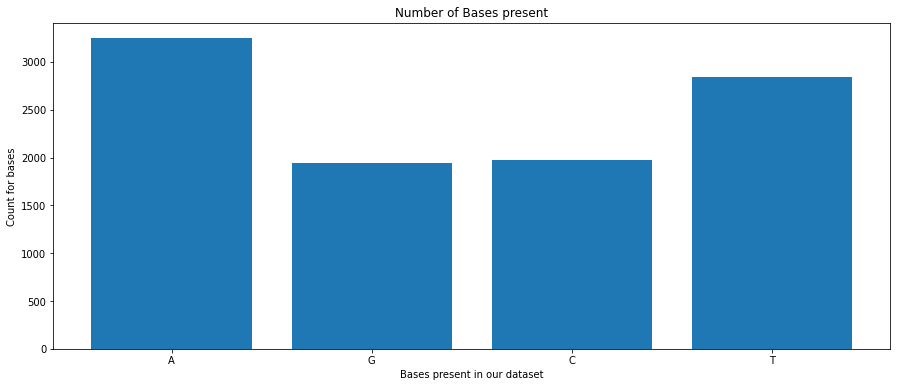

In [66]:
# Visulaising our dataset
keys = countFrequency(test_val).keys()
values = countFrequency(test_val).values()
plt.figure(figsize=(15,6))
plt.bar(keys,values)
plt.title('Number of Bases present')
plt.xlabel('Bases present in our dataset')
plt.ylabel('Count for bases')